In [1]:
# kaggle link : https://www.kaggle.com/datasets/puneet6060/intel-image-classification

In [2]:
!unzip drive/MyDrive/Datasets/intel_img.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

# Execution Steps:
1. Import Libraries
2. Load Data & Create Data Loaders
3. Build Model
4. Train and Evaluate the Model

# Step 1: Import Libraries

In [3]:
# Libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Step 2: Load Data & Create Data Loaders

In [4]:
img_gen = ImageDataGenerator(rescale=1./255)

In [5]:
train_loader = img_gen.flow_from_directory(
    directory = "seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42
)

test_loader = img_gen.flow_from_directory(
    directory = "seg_test/seg_test", target_size = (128, 128), batch_size = 50, seed = 42
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [7]:
idx_to_classes = {val:key for key, val in dict(train_loader.class_indices).items()}
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

# Step 3: Build Model

In [12]:
model = Sequential()
# Convolution 1
model.add(Conv2D(32, kernel_size=(3,3), activation = "relu", input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Convolution 2
model.add(Conv2D(64, kernel_size=(3,3), activation = "relu"))
model.add(AvgPool2D(pool_size = (3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully Connected Layers
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.3))
model.add(Dense(6, activation = "softmax"))

In [13]:
model.compile(optimizer="adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [14]:
# Steps
train_steps = len(train_loader)    # = (round(total_train_images / batch_size))
test_steps = len(test_loader)    # = (round(total_test_images / batch_size))

In [15]:
train_metrics = model.fit_generator(
    generator = train_loader, 
    steps_per_epoch = train_steps, 
    epochs = 20, 
    validation_data = test_loader, 
    validation_steps = test_steps
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


281/281 [==============================] - 20s 69ms/step - loss: 1.4352 - accuracy: 0.5262 - val_loss: 1.8654 - val_accuracy: 0.3297
Epoch 2/20
281/281 [==============================] - 19s 68ms/step - loss: 1.0009 - accuracy: 0.6249 - val_loss: 1.3408 - val_accuracy: 0.5720
Epoch 3/20
281/281 [==============================] - 19s 68ms/step - loss: 0.8502 - accuracy: 0.6864 - val_loss: 2.3079 - val_accuracy: 0.3937
Epoch 4/20
281/281 [==============================] - 19s 69ms/step - loss: 0.7704 - accuracy: 0.7151 - val_loss: 0.9347 - val_accuracy: 0.7013
Epoch 5/20
281/281 [==============================] - 20s 69ms/step - loss: 0.7002 - accuracy: 0.7343 - val_loss: 0.7700 - val_accuracy: 0.7547
Epoch 6/20
281/281 [==============================] - 20s 69ms/step - loss: 0.6489 - accuracy: 0.7574 - val_loss: 0.7204 - val_accuracy: 0.7663
Epoch 7/20
281/281 [==============================] - 21s 73ms/step - loss: 0.6013 - accuracy: 0.7788 - val_loss: 0.5693 - val_accuracy: 0.8047
Epo

# Model Metrics

In [18]:
train_loss = train_metrics.history["loss"]
train_accuracy = train_metrics.history["accuracy"]
test_loss = train_metrics.history["val_loss"]
test_accuracy = train_metrics.history["val_accuracy"]

### Train Loss vs Validation Loss

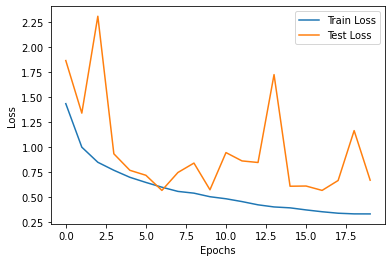

In [19]:
plt.plot(range(20), train_loss, label = "Train Loss")
plt.plot(range(20), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Train Accuracy vs Validation Accuracy

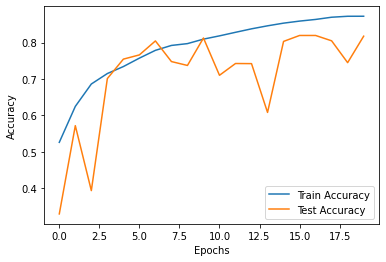

In [20]:
plt.plot(range(20), train_accuracy, label = "Train Accuracy")
plt.plot(range(20), test_accuracy, label = "Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Model Performance Demonstration

In [22]:
pred_list = [f"seg_pred/seg_pred/{i}" for i in os.listdir("seg_pred/seg_pred")]

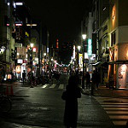

Model Prediction:  street


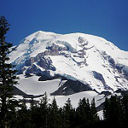

Model Prediction:  glacier


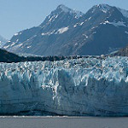

Model Prediction:  glacier


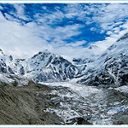

Model Prediction:  glacier


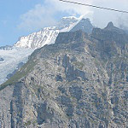

Model Prediction:  mountain


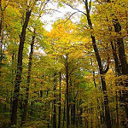

Model Prediction:  forest


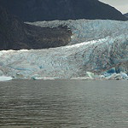

Model Prediction:  glacier


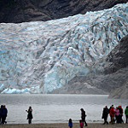

Model Prediction:  glacier


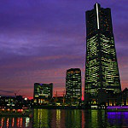

Model Prediction:  buildings


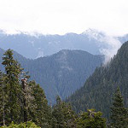

Model Prediction:  mountain


In [26]:
for i in range(10):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128, 128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ",idx_to_classes[pred])
  print("==========================================")